# 3D box surface plot of voxel data

> Based on [matplotlib tutorial](https://matplotlib.org/stable/gallery/mplot3d/box3d.html#sphx-glr-gallery-mplot3d-box3d-py)

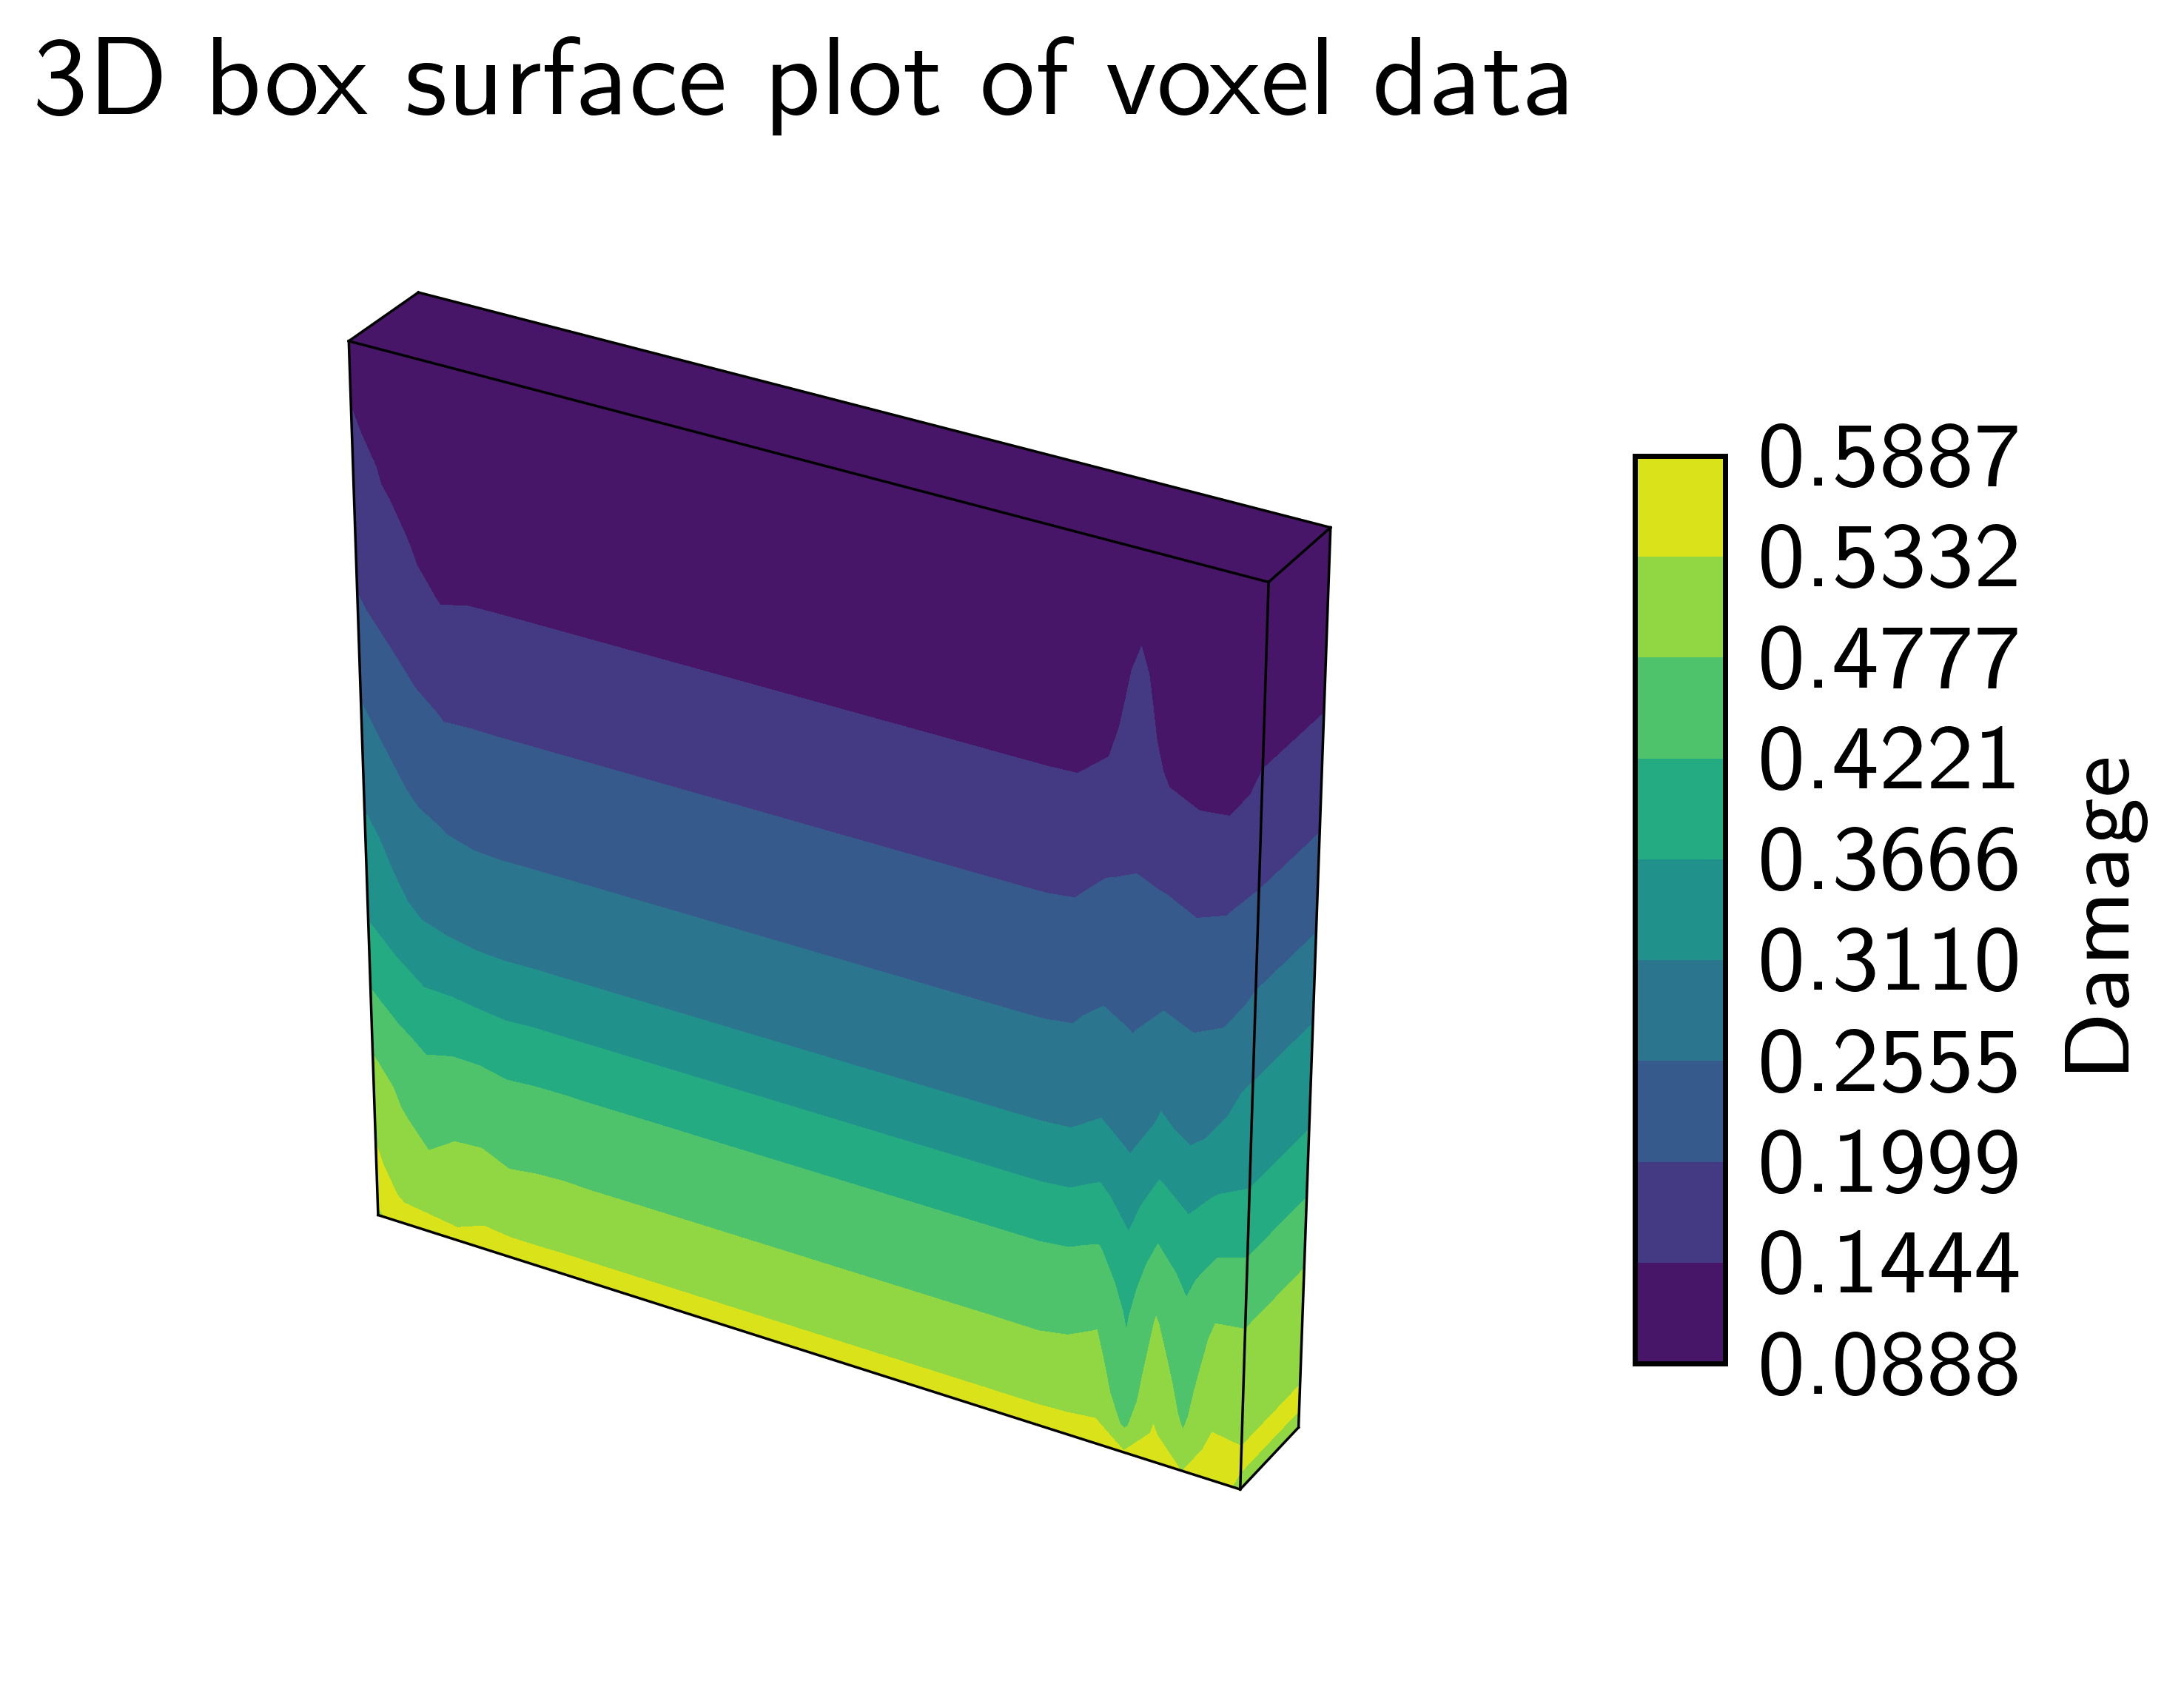

Total time taken for generating input files:  0.7391762733459473 (seconds)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import cm_vis

timeStart = time.time()

# Load data (Assuming columns: x, y, z, c)
data = pd.read_csv("./sample_data/damage.vox", header=None, names=["x", "y", "z", "value"])

# get space info
x_vals = np.sort(data["x"].unique())
y_vals = np.sort(data["y"].unique())
z_vals = np.sort(data["z"].unique())

# build mesh
X, Y, Z = np.meshgrid(x_vals, y_vals, z_vals, indexing="ij")

# arrange data
values = data.pivot_table(index=["x", "y", "z"], values="value").values.reshape(len(x_vals), len(y_vals), len(z_vals))

plt.style.use("sans")
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d", aspect="equal")

kw = {
    "vmin": values.min(),
    "vmax": values.max(),
    "levels": np.linspace(values.min(), values.max(), 10),
}

# plot countourf surface
# xy
C = ax.contourf(X[:, :, -1], Y[:, :, -1], values[:, :, -1], zdir="z", offset=Z.max(), **kw)
_ = ax.contourf(X[:, :, 0], Y[:, :, 0], values[:, :, 0], zdir="z", offset=Z.min(), **kw)

# xz
_ = ax.contourf(X[:, 0, :], values[:, 0, :], Z[:, 0, :], zdir="y", offset=Y.min(), **kw)
_ = ax.contourf(X[:, -1, :], values[:, -1, :], Z[:, -1, :], zdir="y", offset=Y.max(), **kw)

# yz
_ = ax.contourf(values[0, :, :], Y[0, :, :], Z[0, :, :], zdir="x", offset=X.min(), **kw)
_ = ax.contourf(values[-1, :, :], Y[-1, :, :], Z[-1, :, :], zdir="x", offset=X.max(), **kw)

# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot edges
edges_kw = dict(color="k", lw=0.25, zorder=1e3)
ax.plot([xmax, xmax], [ymin, ymax], zmin, **edges_kw)
ax.plot([xmax, xmax], [ymin, ymax], zmax, **edges_kw)
ax.plot([xmin, xmin], [ymin, ymax], zmax, **edges_kw)

ax.plot([xmin, xmax], [ymin, ymin], zmax, **edges_kw)
ax.plot([xmin, xmax], [ymax, ymax], zmax, **edges_kw)
ax.plot([xmin, xmax], [ymax, ymax], zmin, **edges_kw)

ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)
ax.plot([xmax, xmax], [ymax, ymax], [zmin, zmax], **edges_kw)
ax.plot([xmin, xmin], [ymax, ymax], [zmin, zmax], **edges_kw)

ax.view_init(azim=30, vertical_axis="y")
ax.set_box_aspect([1 / 8, 1, 1])
ax.set_title("3D box surface plot of voxel data")

cbar = fig.colorbar(C, ax=ax, shrink=0.6, aspect=10)
cbar.set_label("Damage")

ax.set_axis_off()
plt.show()

timeEnd = time.time()

print("Total time taken for generating input files: ", timeEnd - timeStart, "(seconds)")